In [27]:
# #!pip install pandas==1.3.3
# #!pip install requests==2.26.0
# !mamba install bs4==4.10.0 -y
# !mamba install html5lib==1.1 -y 
# !pip install lxml==4.6.4
# #!pip install plotly==5.3.1

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [36]:
# Question 1 - Extracting Tesla Stock Data Using yfinance
# Define the ticker symbol for Tesla (TSLA)
ticker = "TSLA"

# Create a ticker object
tesla = yf.Ticker(ticker)

# Get the historical stock data for Tesla
historical_data = tesla.history(period="1d", start="2023-01-01", end="2023-06-18")

# Print the extracted data
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,118.470001,118.800003,104.639999,108.099998,231402800,0,0
2023-01-04 00:00:00-05:00,109.110001,114.589996,107.519997,113.639999,180389000,0,0
2023-01-05 00:00:00-05:00,110.510002,111.750000,107.160004,110.339996,157986300,0,0
2023-01-06 00:00:00-05:00,103.000000,114.389999,101.809998,113.059998,220911100,0,0
2023-01-09 00:00:00-05:00,118.959999,123.519997,117.110001,119.769997,190284000,0,0


In [19]:
# Question 2 - Extracting Tesla Revenue Data Using Webscraping

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# Send a GET request to the webpage
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")



In [18]:
# Find the table containing the revenue data
table = soup.find("table", {"class": "historical_data_table"})

# Extract the table headers
headers = table.findAll("th")
header_row = [header.get_text(strip=True) for header in headers]

# Extract the table rows
rows = table.findAll("tr")
data = []
for row in rows[1:]:
    row_data = [cell.get_text(strip=True) for cell in row.findAll("td")]
    data.append(row_data)

# Print the table headers
print(header_row)

# Print the revenue data
for row in data:
    print(row)

['Tesla Annual Revenue(Millions of US $)']
['2022', '$81,462']
['2021', '$53,823']
['2020', '$31,536']
['2019', '$24,578']
['2018', '$21,461']
['2017', '$11,759']
['2016', '$7,000']
['2015', '$4,046']
['2014', '$3,198']
['2013', '$2,013']
['2012', '$413']
['2011', '$204']
['2010', '$117']
['2009', '$112']


In [38]:
# Question 3 - Extracting GameStop Stock Data Using yfinance
# Define the ticker symbol for GME (GME)
ticker = "GME"

# Create a ticker object
gme = yf.Ticker(ticker)

# Get the historical stock data for GME
historical_data = gme.history(period="1d", start="2023-01-01", end="2023-06-18")

# Print the extracted data
historical_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,18.639999,19.260000,17.090000,17.200001,5135200,0,0
2023-01-04 00:00:00-05:00,17.250000,17.930000,16.900000,17.320000,3939300,0,0
2023-01-05 00:00:00-05:00,17.059999,17.260000,15.890000,16.219999,6066200,0,0
2023-01-06 00:00:00-05:00,16.000000,16.570000,15.410000,16.459999,4823400,0,0
2023-01-09 00:00:00-05:00,16.650000,17.129999,16.360001,16.379999,3522600,0,0


In [22]:
# Question 4 - Extracting GameStop Revenue Data Using Webscraping

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
# Send a GET request to the webpage
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the revenue data
table = soup.find("table", {"class": "historical_data_table"})

# Extract the table headers
headers = table.findAll("th")
header_row = [header.get_text(strip=True) for header in headers]

# Extract the table rows
rows = table.findAll("tr")
data = []
for row in rows[1:]:
    row_data = [cell.get_text(strip=True) for cell in row.findAll("td")]
    data.append(row_data)

# Print the table headers
print(header_row)

# Print the revenue data
for row in data:
    print(row)

['GameStop Annual Revenue(Millions of US $)']
['2023', '$5,927']
['2022', '$6,011']
['2021', '$5,090']
['2020', '$6,466']
['2019', '$8,285']
['2018', '$8,547']
['2017', '$7,965']
['2016', '$9,364']
['2015', '$9,296']
['2014', '$9,040']
['2013', '$8,887']
['2012', '$9,551']
['2011', '$9,474']
['2010', '$9,078']
['2009', '$8,806']


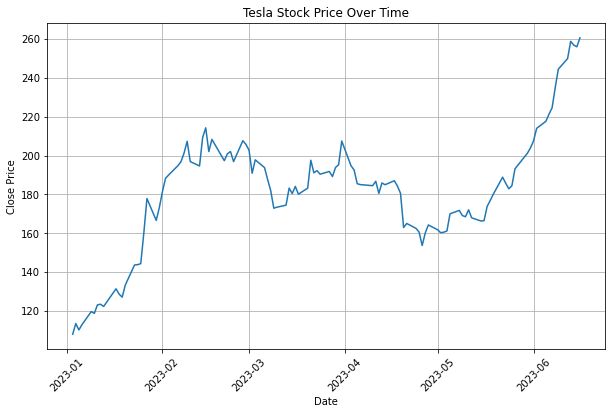

In [37]:
# Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
def make_graph(dataframe, title):
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe.index, dataframe['Close'])
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.grid(True)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()


# Define the title for the graph
graph_title = "Tesla Stock Price Over Time"

# Call the make_graph function with the data and title
make_graph(historical_data, graph_title)


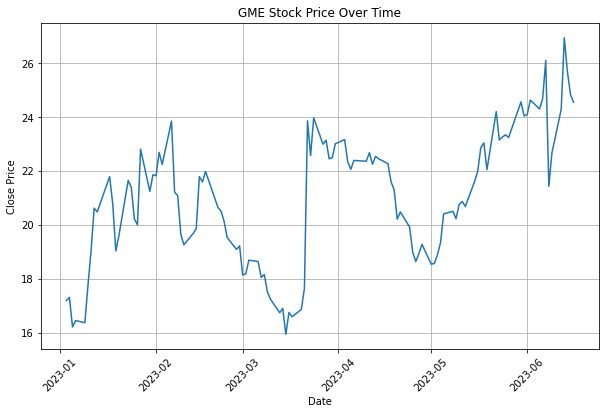

In [39]:

# Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

def make_graph(dataframe, title):
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe.index, dataframe['Close'])
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.grid(True)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()


# Define the title for the graph
graph_title = "GME Stock Price Over Time"

# Call the make_graph function with the data and title
make_graph(historical_data, graph_title)
# Question 7 - Sharing your Assignment Notebook - 2 Points